# Challenge 6 - Object Detection (with the Custom Vision Service)
1. Create an account at https://customvision.ai
2. Create a databricks library for **azure-cognitiveservices-vision-customvision** and attach it to the cluster
3. Modify the service keys below to match your service keys

In [2]:
TRAINING_KEY = 'YOUR_KEY'
PREDICTION_KEY = 'YOUR_KEY'
ENDPOINT='https://southcentralus.api.cognitive.microsoft.com' # If not using free trial, change to match your Azure service location

In [3]:
# Download the safety images

import os
import shutil
import requests
from io import BytesIO
from PIL import Image

# Create an empty folder
folder = '/dbfs/safety_images'
if os.path.exists(folder):
    shutil.rmtree(folder)
os.makedirs(folder)

# Get the list of image URLs
!curl https://challenge.blob.core.windows.net/challengefiles/summit_post_urls_selected.txt -o urls.txt
urls = open("urls.txt", "r")

# Download each image
for url in urls.readlines():
    url = url.rstrip()
    filename = url.split('/')[-1]
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    saveAs = os.path.join(folder, filename)
    print("writing " + saveAs)
    img.save(saveAs, 'JPEG')

writing /dbfs/safety_images/434140.jpg
writing /dbfs/safety_images/434502.jpg
writing /dbfs/safety_images/434922.jpg
writing /dbfs/safety_images/434947.jpg
writing /dbfs/safety_images/480835.jpg
writing /dbfs/safety_images/480836.jpg
writing /dbfs/safety_images/480837.jpg
writing /dbfs/safety_images/480839.JPG
writing /dbfs/safety_images/480840.jpg
writing /dbfs/safety_images/480863.jpg
writing /dbfs/safety_images/480864.jpg
writing /dbfs/safety_images/480869.jpg
writing /dbfs/safety_images/480884.jpg
writing /dbfs/safety_images/480894.jpg
writing /dbfs/safety_images/480910.jpg
writing /dbfs/safety_images/480942.jpg
writing /dbfs/safety_images/480979.jpg
writing /dbfs/safety_images/480980.jpg
writing /dbfs/safety_images/480982.jpg
writing /dbfs/safety_images/480986.jpg
writing /dbfs/safety_images/480988.jpg
writing /dbfs/safety_images/480998.jpg
writing /dbfs/safety_images/481003.jpg
writing /dbfs/safety_images/481006.jpg
writing /dbfs/safety_images/481007.jpg
writing /dbfs/safety_images/481012.jpg
writing /dbfs/safety_images/481017.jpg
writing /dbfs/safety_images/481018.jpg
writing /dbfs/safety_images/481019.jpg
writing /dbfs/safety_images/481022.jpg
writing /dbfs/safety_images/481023.jpg
writing /dbfs/safety_images/481025.jpg
writing /dbfs/safety_images/481042.jpg
writing /dbfs/safety_images/481045.jpg
writing /dbfs/safety_images/481064.jpg
writing /dbfs/safety_images/481068.JPG
writing /dbfs/safety_images/481085.jpg
writing /dbfs/safety_images/481090.JPG
writing /dbfs/safety_images/481093.jpg
writing /dbfs/safety_images/481095.jpg
writing /dbfs/safety_images/481098.jpg
writing /dbfs/safety_images/481099.jpg
writing /dbfs/safety_images/481123.jpg
writing /dbfs/safety_images/481126.jpg
writing /dbfs/safety_images/481127.jpg
writing /dbfs/safety_images/481136.JPG
writing /dbfs/safety_images/481143.JPG
writing /dbfs/safety_images/481144.jpg
writing /dbfs/safety_images/481146.JPG
writing /dbfs/safety_images/481150.JPG
writing /dbfs/safety_images/481171.JPG
writing /dbfs/safety_images/481174.JPG
writing /dbfs/safety_images/481187.jpg
writing /dbfs/safety_images/481199.jpg
writing /dbfs/safety_images/481216.JPG
writing /dbfs/safety_images/481218.jpg
writing /dbfs/safety_images/481220.jpg
writing /dbfs/safety_images/481223.jpg
writing /dbfs/safety_images/481225.jpg
writing /dbfs/safety_images/481231.JPG
writing /dbfs/safety_images/481252.JPG
writing /dbfs/safety_images/481254.JPG
writing /dbfs/safety_images/481257.JPG
writing /dbfs/safety_images/481258.jpg
writing /dbfs/safety_images/481263.jpg
writing /dbfs/safety_images/481267.jpg
writing /dbfs/safety_images/481282.jpg
writing /dbfs/safety_images/481284.JPG
writing /dbfs/safety_images/481295.JPG
writing /dbfs/safety_images/481315.jpg
writing /dbfs/safety_images/481317.jpg
writing /dbfs/safety_images/481321.jpg
writing /dbfs/safety_images/481323.jpg
writing /dbfs/safety_images/481332.JPG
writing /dbfs/safety_images/481340.JPG
writing /dbfs/safety_images/481341.JPG
writing /dbfs/safety_images/481342.JPG
writing /dbfs/safety_images/481343.JPG
writing /dbfs/safety_images/481344.JPG
writing /dbfs/safety_images/481345.JPG
writing /dbfs/safety_images/481347.JPG
writing /dbfs/safety_images/481348.jpg
writing /dbfs/safety_images/481349.jpg
writing /dbfs/safety_images/481350.JPG
writing /dbfs/safety_images/481351.JPG
writing /dbfs/safety_images/481352.JPG
writing /dbfs/safety_images/481353.JPG
writing /dbfs/safety_images/481356.JPG
writing /dbfs/safety_images/481358.JPG
writing /dbfs/safety_images/481359.JPG
writing /dbfs/safety_images/481367.jpg
writing /dbfs/safety_images/481371.jpg
writing /dbfs/safety_images/481372.jpg
writing /dbfs/safety_images/481374.jpg
writing /dbfs/safety_images/481379.jpg
writing /dbfs/safety_images/481380.jpg
writing /dbfs/safety_images/481381.jpg
writing /dbfs/safety_images/481383.jpg
writing /dbfs/safety_images/481385.jpg
writing /dbfs/safety_images/481387.jpg
writing /dbfs/safety_images/481397.JPG
writing /dbfs/safety_images/481405.JPG
writing /dbfs/safety_i

The tag files were created using the [VoTT](https://github.com/Microsoft/VoTT). To keep things simple, the following code just writes them as text files

In [5]:
%%writefile helmets.txt
/dbfs/safety_images/434922.jpg,303,179,358,212
/dbfs/safety_images/480980.jpg,2162,562,2354,710
/dbfs/safety_images/480986.jpg,850,1284,1089,1489
/dbfs/safety_images/480998.jpg,1205,434,1637,690
/dbfs/safety_images/481012.jpg,624,1275,979,1504
/dbfs/safety_images/481019.jpg,148,164,187,209
/dbfs/safety_images/481146.JPG,421,256,497,333
/dbfs/safety_images/481171.JPG,451,825,720,1094
/dbfs/safety_images/482767.JPG,696,247,1046,453
/dbfs/safety_images/482812.JPG,259,554,830,935
/dbfs/safety_images/482882.JPG,1732,793,1920,923
/dbfs/safety_images/483064.jpg,425,76,514,140
/dbfs/safety_images/483065.JPG,401,563,714,746
/dbfs/safety_images/483085.jpg,1579,158,2310,693
/dbfs/safety_images/483160.jpg,656,525,867,707
/dbfs/safety_images/483327.JPG,766,269,1089,572
/dbfs/safety_images/483448.jpg,637,252,827,394


Writing helmets.txt

In [6]:
%%writefile nohelmets.txt
/dbfs/safety_images/480942.jpg,43,116,1672,1470
/dbfs/safety_images/481018.jpg,936,531,1143,688
/dbfs/safety_images/481025.jpg,117,71,567,348
/dbfs/safety_images/481064.jpg,500,153,623,246
/dbfs/safety_images/481143.JPG,597,238,1280,624
/dbfs/safety_images/481216.JPG,1312,189,1449,273
/dbfs/safety_images/481220.jpg,51,45,264,230
/dbfs/safety_images/481252.JPG,97,186,378,341
/dbfs/safety_images/481405.JPG,395,72,478,129
/dbfs/safety_images/481758.JPG,914,740,1283,980
/dbfs/safety_images/481962.JPG,403,557,492,631
/dbfs/safety_images/482339.JPG,899,468,1104,607
/dbfs/safety_images/481340.JPG,889,1257,1450,1576
/dbfs/safety_images/481421.jpg,525,568,849,801
/dbfs/safety_images/483463.JPG,157,349,1778,506


Writing nohelmets.txt

In [7]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateEntry, Region

trainer = CustomVisionTrainingClient(TRAINING_KEY, endpoint=ENDPOINT)

# Find the object detection domain
obj_detection_domain = next(domain for domain in trainer.get_domains() if domain.type == "ObjectDetection")

# Create a new project
print ("Creating project...")
project = trainer.create_project("Safety Detection", domain_id=obj_detection_domain.id)

Creating project...

In [8]:
helmet_tag = trainer.create_tag(project.id, "Helmet")
nohelmet_tag = trainer.create_tag(project.id, "No_Helmet")
print('Created tags')

Created tags

In [9]:
def tag_images(txtFile, tag):
    import pandas as pd
    import numpy as np
    from matplotlib import image as mpimg

    print ("Tagging images from", txtFile)
    df=pd.read_csv(txtFile, sep=',',header=None)
    for row in df.values:
        file_name,l,t,r,b = row
        print(file_name)
        #normalize values
        img = mpimg.imread(file_name)
        img_h, img_w, img_ch = img.shape
        l = l / img_w
        r = r / img_w
        t = t/img_h
        b = b / img_h

        w = r-l
        h = b-t

        regions = [Region(tag_id=tag, left=l,top=t,width=w,height=h) ]

        with open(file_name, mode="rb") as image_contents:
            tagged_images_with_regions.append(ImageFileCreateEntry(name=file_name, contents=image_contents.read(), regions=regions))


tagged_images_with_regions = []
tag_images('helmets.txt', helmet_tag.id)
tag_images('nohelmets.txt', nohelmet_tag.id)
print('Adding images to project...')
trainer.create_images_from_files(project.id, images=tagged_images_with_regions)


Tagging images from helmets.txt
/dbfs/safety_images/434922.jpg
/dbfs/safety_images/480980.jpg
/dbfs/safety_images/480986.jpg
/dbfs/safety_images/480998.jpg
/dbfs/safety_images/481012.jpg
/dbfs/safety_images/481019.jpg
/dbfs/safety_images/481146.JPG
/dbfs/safety_images/481171.JPG
/dbfs/safety_images/482767.JPG
/dbfs/safety_images/482812.JPG
/dbfs/safety_images/482882.JPG
/dbfs/safety_images/483064.jpg
/dbfs/safety_images/483065.JPG
/dbfs/safety_images/483085.jpg
/dbfs/safety_images/483160.jpg
/dbfs/safety_images/483327.JPG
/dbfs/safety_images/483448.jpg
Tagging images from nohelmets.txt
/dbfs/safety_images/480942.jpg
/dbfs/safety_images/481018.jpg
/dbfs/safety_images/481025.jpg
/dbfs/safety_images/481064.jpg
/dbfs/safety_images/481143.JPG
/dbfs/safety_images/481216.JPG
/dbfs/safety_images/481220.jpg
/dbfs/safety_images/481252.JPG
/dbfs/safety_images/481405.JPG
/dbfs/safety_images/481758.JPG
/dbfs/safety_images/481962.JPG
/dbfs/safety_images/482339.JPG
/dbfs/safety_images/481340.JPG
/dbfs/safety_images/481421.jpg
/dbfs/safety_images/483463.JPG
Adding images to project...
 Out[ 7 ]: <azure.cognitiveservices.vision.customvision.training.models.image_create_summary_py3.ImageCreateSummary at 0x7f43b46076a0>

In [10]:
import time

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# Set the default iteration
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

perf = trainer.get_iteration_performance(project.id, iteration.id)
print('Performance by tag:')
for tag in perf.per_tag_performance:
    print (tag.name, '\n\tPrecision:',tag.precision, '\n\tRecall:', tag.recall)

Training...
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed
Done!
Performance by tag:
No_Helmet 
	Precision: 0.0 
	Recall: 0.0
Helmet 
	Precision: 0.75 
	Recall: 0.75

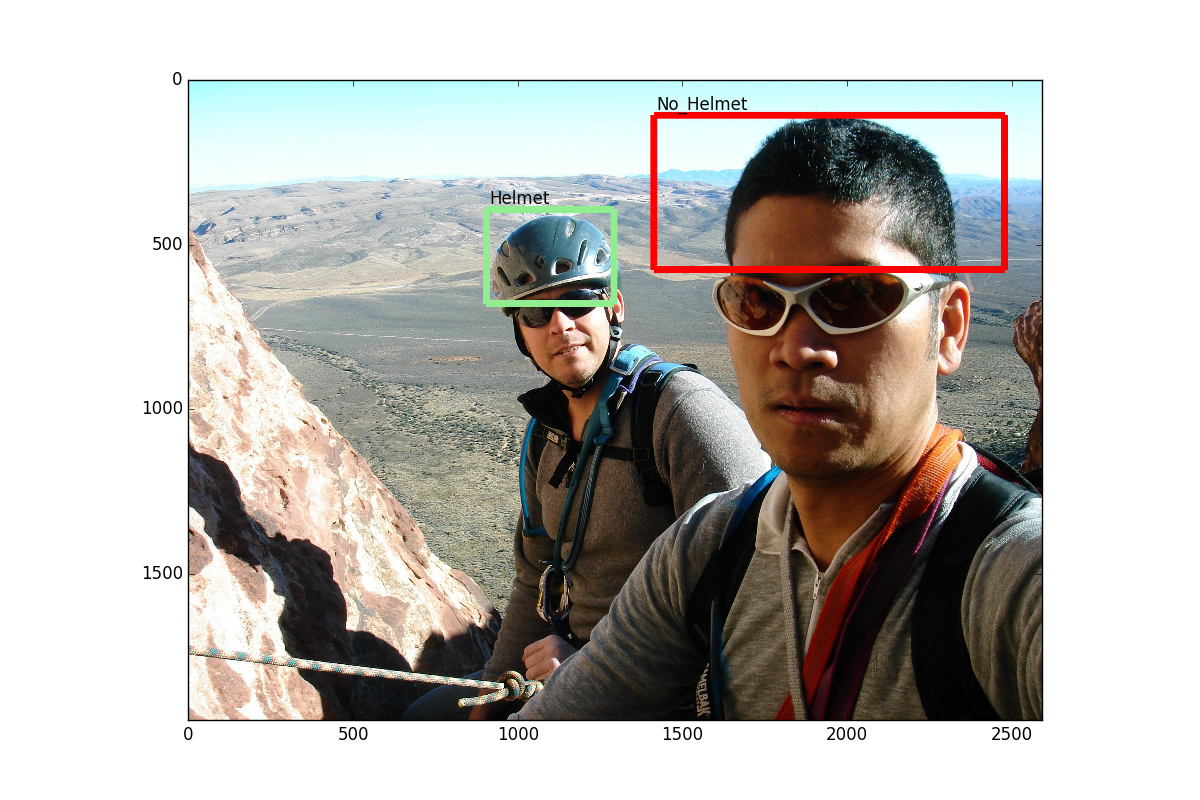

In [11]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.prediction import models
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Now there is a trained endpoint that can be used to make a prediction
test_img_file = "/dbfs/safety_images/483245.JPG"
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape
    
predictor = CustomVisionPredictionClient(PREDICTION_KEY, endpoint=ENDPOINT)

# Open the sample image and get back the prediction results.
with open(test_img_file, mode="rb") as test_data:
    results = predictor.predict_image(project.id, test_data, iteration.id)
    


# Display the results.
fig = plt.figure(figsize=(12, 8))
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/120)
color = 'lightgreen'
for prediction in results.predictions:
    if (prediction.probability*100) > 50:  
        if prediction.tag_id == nohelmet_tag.id:
            color = 'red'
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name,(left+10,top-20))
        
plt.imshow(test_img)

display(fig)
